In [ ]:
!pip install resampy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.2 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import os
# from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten,Conv2D, MaxPooling2D, Reshape,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder


In [ ]:
def extract_features(file_path):
    try:
        # Load audio file with librosa
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # Compute the mean of MFCCs (aggregate features)
        mfccs_processed = np.mean(mfccs.T, axis=0)
        # print("done")
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}")
        print(f"Error details: {e}")
        return None
    return mfccs_processed



In [ ]:

human_music_path = '/content/drive/MyDrive/normal_music'
ai_music_path = '/content/drive/MyDrive/ai_music'

In [ ]:
# Load dataset and extract features
features = []
labels = []

# Human music
for file in os.listdir(human_music_path):
    file_path = os.path.join(human_music_path, file)
    class_label = "Human"
    data = extract_features(file_path)
    if data is not None:
        features.append(data)
        labels.append(class_label)

# AI music
for file in os.listdir(ai_music_path):
    file_path = os.path.join(ai_music_path, file)
    class_label = "AI"
    data = extract_features(file_path)
    if data is not None:
        features.append(data)
        labels.append(class_label)

# Convert into numpy arrays
features = np.array(features)
labels = np.array(labels)


In [ ]:
def extract_mfccs(file_path, n_mfcc=13, hop_length=512, n_fft=2048):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
    return mfccs

# Example: Load a sample file and extract MFCCs
file_path = '/content/drive/MyDrive/normal_music/Tadz_20-_20Outro_20_28Progression_20Through_20Confession_29.wav'  # Replace with your audio file path
mfccs = extract_mfccs(file_path)


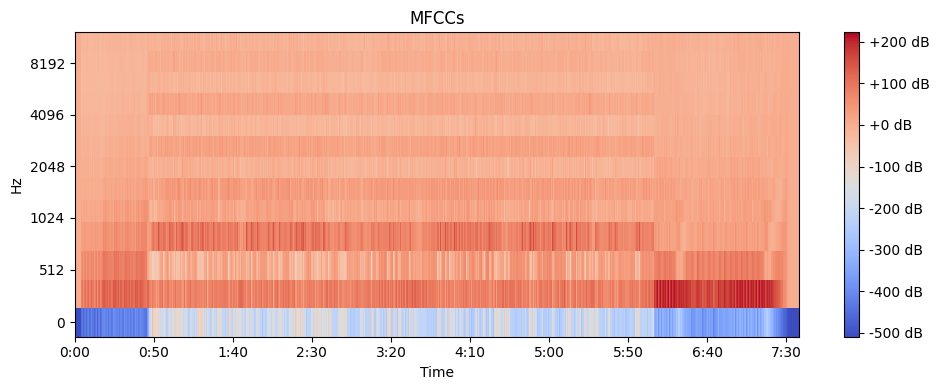

In [ ]:
plt.figure(figsize=(10, 4))
audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
librosa.display.specshow(mfccs, sr=sample_rate, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.tight_layout()
plt.show()


In [ ]:
features[5]

array([-159.80605   ,  114.54932   ,    4.11927   ,    9.736934  ,
         -6.048219  ,   -2.942321  ,  -14.985631  ,   -0.7759971 ,
         -9.373029  ,    4.4353185 ,  -12.751895  ,   -1.4773585 ,
        -11.483413  ,    1.6954665 ,   -7.4723687 ,    1.2330779 ,
         -6.4361215 ,    0.16266854,   -8.92626   ,   -0.35079786,
         -3.5520642 ,    0.92091686,   -5.430645  ,   -1.0117612 ,
         -7.806786  ,   -5.058468  ,   -6.5705323 ,    0.70515287,
          1.6189775 ,    1.976556  ,   -0.988609  ,    0.8473734 ,
          2.182433  ,    1.165908  ,   -2.812841  ,   -2.212377  ,
         -3.2764518 ,   -3.5923367 ,   -3.2583709 ,   -2.341888  ],
      dtype=float32)

In [ ]:
# Encode labels
le = LabelEncoder()
yy = le.fit_transform(labels)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(features, yy, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes: Human and AI

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=1)


Epoch 1/10
6/6 [==============================] - 1s 51ms/step - loss: 7.9501 - accuracy: 0.4944 - val_loss: 1.6888 - val_accuracy: 0.6522
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 6.6358 - accuracy: 0.5167 - val_loss: 2.8263 - val_accuracy: 0.5435
Epoch 3/10
6/6 [==============================] - 0s 13ms/step - loss: 6.0536 - accuracy: 0.5944 - val_loss: 2.1515 - val_accuracy: 0.6522
Epoch 4/10
6/6 [==============================] - 0s 11ms/step - loss: 5.5134 - accuracy: 0.6500 - val_loss: 1.5116 - val_accuracy: 0.6739
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 4.8628 - accuracy: 0.5889 - val_loss: 1.2775 - val_accuracy: 0.6957
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 5.1020 - accuracy: 0.5778 - val_loss: 0.9168 - val_accuracy: 0.7391
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 3.1329 - accuracy: 0.6333 - val_loss: 1.3418 - val_accuracy: 0.6522
Epoch 8/10
6/6 [===========

In [ ]:
# Evaluate the model
test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {:.2f}%".format(test_accuracy[1] * 100))


Test accuracy: 80.43%


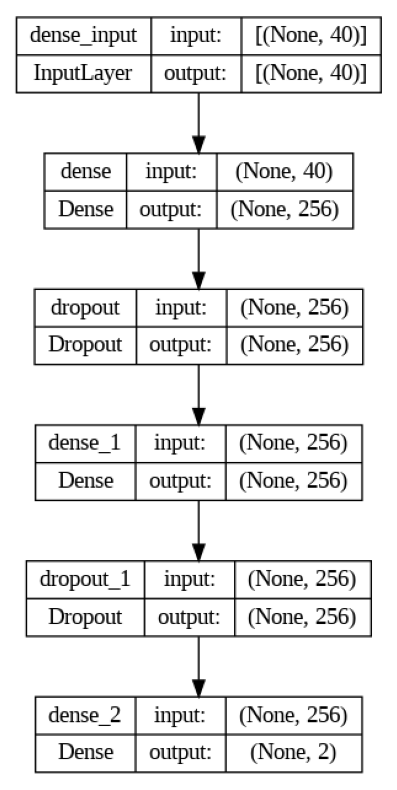

In [ ]:
# Generate a plot of your model
plot_model(model, to_file='model_architecture.png',show_shapes=True, show_layer_names=True)

# Display the image in the notebook
img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

2/2 [==============================] - 0s 4ms/step


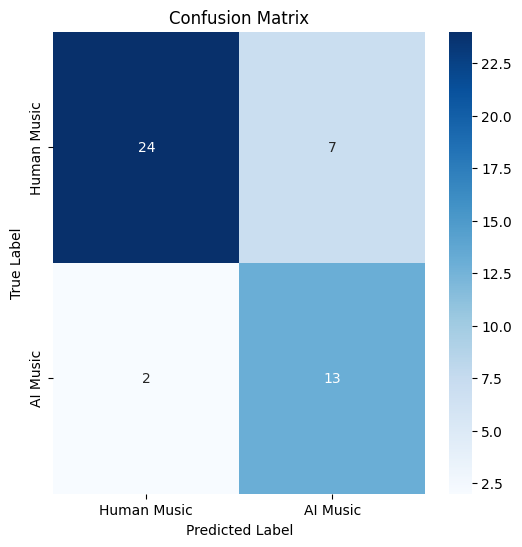

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_test, y_pred_classes, classes=['Human Music', 'AI Music'])
